#  Python Assignment

|Name|U-number|email|
|----|----|----|
|Guus Kompier|U1254284|g.a.kompier@tilburguniversity.edu|
|Guus van de Wakker|U1245976|a.b.van.de.wakker@tilburguniversity.edu|
|Leahna Truijen|U1259957|l.truijen@tilburguniversity.edu|

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import arange
from numpy import array
from scipy import optimize,arange
import math
import numpy as np
from sklearn import linear_model

In [2]:
import plotly.plotly as py

from plotly.graph_objs import Figure, Bar
import plotly.graph_objs as go
import plotly
print(plotly.__version__)

1.13.0


In [3]:
import plotly 
plotly.tools.set_credentials_file(username='guuswakker', api_key='ZHJh6K8qxGpDsl8vCzrt')
import plotly 
plotly.tools.set_config_file(world_readable=False,
                             sharing='private')

## Question

What is the effect of transportation costs, price elasticity and labor mobility on agglomeration?

## Motivation 

As globalization becomes a bigger part of the current economy, trade between countries increases as well. One might wonder why the world doesn’t become one big agglomeration instead of different (smaller) states trading with each other. One big agglomeration will allow for exploiting economies of agglomeration, arising from knowledge spillovers, labor market pooling, input sharing and natural advantage [Rosenthal, Stuart S and William C. Strange, (2004)](http://ac.els-cdn.com/S1574008004800063/1-s2.0-S1574008004800063-main.pdf?_tid=cf6bd900-e301-11e6-9315-00000aab0f01&acdnat=1485350939_26d5d8d65a9961820c070a22839b0451). In reality, it is of course not possible to have all people of the world living in the same place. For some sectors it is just not possible to move easily. Take for example agriculture, certain crops only grow in certain areas, moving these to the city will not be possible. In this assignment we want to figure out how certain forces influence agglomeration and how it is possible that not all sectors of production that are mobile, move together into one big agglomeration.

## Method

To answer this question we will use the simple analytically solvable agglomeration model by [Michael Pflüger (2003)](http://www.diw.de/documents/publikationen/73/diw_01.c.40255.de/dp339.pdf). This model studies the effects of different parameters such as transportation costs and price elasticityparameters on agglomeration. We use this model since equilibria can easily be identified. An equilibrium occurs when there are no people willing to move anymore, so there is a steady state of agglomeration. At each intersection point of the plotline with the y=0 line, there exists an equilibrium. In this assignment we will first indicate all the parameters of the model and write out the model in equation form. Thereafter, we will create graphs that show different values of a certain parameter in the same graph for an easy ceteris paribus comparison. These graphs will give us more insight in the way certain parameters influence agglomeration.

##  Answer

#### *Effect of transportation costs*
There is a negative relationship between transportation costs and agglomeration. As transportation costs decrease, the degree of agglomeration will increase.

#### *Effect of price elasticity*
There is a negative relationship between the price elaticity and agglomeration. As the price elasticity decreases, the degree of agglomeration will increase.

#### *Effect of labor mobility*
There is a positive effect between labor mobility and agglomeration. As the labor mobility within the total population increases, the degree of agglomeration will increase.

A more elaborate discussion of our answer can be found in our <a href='#conclusion'>conclusion</a> 

## Main Assumptions <a id='assumptions'></a> 

* The world is composed of two countries, home and foreign
* There are two factors of production: unskilled labor (L) and skilled labor (K)
* There are two sectors: agriculture (A) and manufacturing (X)
* In the long run, skilled labor is mobile internationally, while unskilled labor is not
* Countries have identical preferences, technologies and trade costs
* The agricultural good is homogeneous, traded without costs and produced perfectly competitive under constant returns with unskilled labor as the only input
* The monopolistic competitive manufacturing sector employs both labor factors to produce differentiated goods with a linear cost function. Unskilled labor is the only variable input. Skilled labor enters only in the fixed cost, one unit is needed


##  Execution

#### <p style="text-align: center;"> *Parameters of the model* </p>
|Symbol|Definition||Symbol|Definition|
|---|---|
|*$\alpha$*|Preference for manufactured goods||*L+K*|population size in the region|
|*c*|Unit production cost||*$\lambda$=K/(K+K**)|share of total skilled labor supply that works home|
|*K*|Skilled labor in region||*$\rho$=L/(K+K**)|Home unskilled labor as a fraction of total skilled labor|
|*L*|Unskilled labor in region||$\rho^*$*=L/(K+*$K^*)$|Foreign unskilled labor as a fraction of total skilled labor|
|*R*|Wage of skilled labor||*$\sigma$*|Price elasticity|
|*W=1*|Wage of unskilled labor||*$\tau$*|Transportation costs|
|*C<sub>A</sub>*|Consumption of agricultural goods||*$\phi$*|*$\phi$=$\tau$<sup>1-$\sigma$</sup>*|
|*C<sub>X</sub>*|Consumption of manufactured goods||*V*|Home utility|
|*|Denotes foreign region||*V**|Foreign utility|

#### <p style="text-align: center;"> *The model* </p>

$$
    V-V^*= \frac{\alpha}{1-\sigma}ln( \frac{\lambda\phi+(1-\lambda)}{\lambda+(1-\lambda)\phi})+ \frac{\alpha(1-\phi)}{\sigma}( \frac{\rho+\lambda}{\lambda+(1-\lambda)\phi}- \frac{\rho^*+(1-\lambda)}{\lambda\phi+(1-\lambda)})
$$


In [4]:
def phi(tau, sigma):
    return tau**(1-sigma)

In [5]:
def DeltaV (labda,alpha,sigma,rho,rho2,tau):
    return alpha/(1-sigma)*math.log((labda*phi(tau, sigma)+(1-labda))/(labda+(1-labda)*phi(tau, sigma)), math.e)+((alpha*(1-phi(tau, sigma))/sigma)*(((rho+labda)/(labda+(1-labda)*phi(tau, sigma)))-((rho2+(1-labda))/(labda*phi(tau, sigma)+(1-labda)))))

#This is the function that is shown above. When it equals 0, there is an equilibrium of the agglomeration which means
#mobile workers are not willing to move anymore

In [6]:
alpha=0.3
sigma=6
tau=1.1
rho=1
rho2=1

def delta1 (labda):
    return DeltaV (labda,alpha,sigma,rho,rho2,tau)

#Here we add in different values for the parameter transportation cost tau, 
#such that we can compare the effect of tau in one graph

range_labda = arange(0,1.1,0.1)
range_delta1 = [delta1(labda) for labda in range_labda]

tau = 1.0  
range_delta17 = [delta1(labda) for labda in range_labda]

tau = 1.4  
range_delta2 = [delta1(labda) for labda in range_labda]

tau = 1.5  
range_delta3 = [delta1(labda) for labda in range_labda]

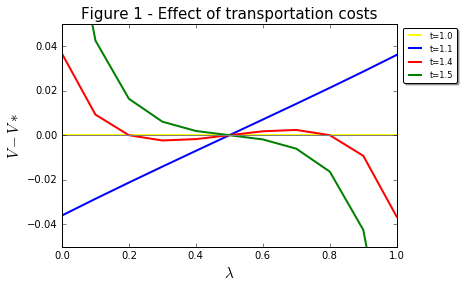

In [7]:
plt.clf()
plt.plot(range_labda, range_delta17, '-', color = 'yellow', linewidth=2,label="t=1.0")
plt.plot(range_labda, range_delta1, '-', color = 'blue', linewidth=2,label="t=1.1")
plt.plot(range_labda, range_delta2, '-', color = 'red', linewidth=2,label="t=1.4")
plt.plot(range_labda, range_delta3, '-', color = 'green', linewidth=2,label="t=1.5")
plt.axhline(0.0, color='grey')
plt.ylim(-.05,.05)
plt.xlim(0,1)
plt.title("Figure 1 - Effect of transportation costs",fontsize = 15) 
plt.xlabel("$\lambda$",fontsize = 15)
plt.ylabel("$V-V*$",fontsize = 15,rotation = 90)
plt.legend(loc="upper center", fontsize='small', shadow='true', fancybox=True, bbox_to_anchor=[1.1,1])

Because the following graphs might be a bit full, we added interactive graphs in the <a href='#appendix'>Appendix</a> which enable you to see detail about the values and also gives an option to only show specific lines.

This figure is a replication from the figure in Michael Pflüger’s paper. It shows that when transportation costs $\tau$ =1.5 there is one stable, symmetric equilibrium where 50% of the high skilled labor is located in the home country and 50% in the foreign country. 
As the transport cost decreases to $\tau$=1.1 we see that the symmetric equilibrium becomes unstable, this is because there are also two equilibria at which 20% of the skilled labor lives in the home country or 80%. Here we see an agglomeration getting formed. The symmetric equilibrium is now unstable because when one skilled person decides to move to another country, many others have the incentive to move as well until the equilibrium of 20% of 80% of skilled labor living in the home country is reached. 
When the transport cost decreases even more to $\tau$=1.1 the stable equilibria will move to full agglomeration which means that 0% or 100% of the skilled labor lives in the home country. This is possible because the low transportation costs allows manufacturers to ship products to the non-skilled workers in the non-agglomeration without losing demand because of the increased costs. 

In [8]:
alpha=0.3
sigma=6
tau=1.4
rho=1
rho2=1

def delta4 (labda):
    return DeltaV (labda,alpha,sigma,rho,rho2,tau)

range_labda = arange(0,1.1,0.1)
range_delta4 = [delta1(labda) for labda in range_labda]

tau = 1.3  
range_delta5 = [delta1(labda) for labda in range_labda]

tau = 1.6  
range_delta6 = [delta1(labda) for labda in range_labda]

tau = 1.8 
range_delta7 = [delta1(labda) for labda in range_labda]

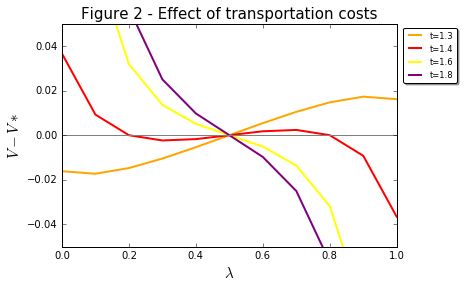

In [9]:
plt.clf()
plt.plot(range_labda, range_delta5, '-', color = 'orange', linewidth=2,label="t=1.3")
plt.plot(range_labda, range_delta4, '-', color = 'red', linewidth=2,label="t=1.4")
plt.plot(range_labda, range_delta6, '-', color = 'yellow', linewidth=2,label="t=1.6")
plt.plot(range_labda, range_delta7, '-', color = 'purple', linewidth=2,label="t=1.8")
plt.axhline(0.0, color='grey')
plt.ylim(-.05,.05)
plt.xlim(0,1)
plt.title("Figure 2 - Effect of transportation costs",fontsize = 15) 
plt.xlabel("$\lambda$",fontsize = 15)
plt.ylabel("$V-V*$",fontsize = 15,rotation = 90)
plt.legend(loc="upper center", fontsize='small', shadow='true', fancybox=True, bbox_to_anchor=[1.1,1])

In this figure we plotted more different values of transportation costs $\tau$. This figure shows that agglomeration is very sensitive to transportation costs. At $\tau$=1.3 there will be full agglomeration at either one of the countries. At $\tau$=1.4 there will be agglomeration but not as strong as full agglomeration. From $\tau$=1.5 onwards there will be no agglomeration and only a stable, symmetric equilibrium where 50% of the skilled labor lives in the home country and the other 50% in the foreign country. This indicates that from $\tau$=1.5 onwards it is not profitable anymore for manufacturers to from an agglomeration because it will be too expensive to ship their products to the immobile, non-skilled workers. 

In [10]:
alpha=0.3
sigma=6
tau = 1.4  
rho=1
rho2=1

def delta8 (labda):
    return DeltaV (labda,alpha,sigma,rho,rho2,tau)

range_labda = arange(0,1.1,0.1)
range_delta8 = [delta1(labda) for labda in range_labda]

sigma=5.8
range_delta9 = [delta1(labda) for labda in range_labda]

sigma=5.5
range_delta10 = [delta1(labda) for labda in range_labda]

sigma=5.2
range_delta11 = [delta1(labda) for labda in range_labda]

sigma=5
range_delta12 = [delta1(labda) for labda in range_labda]

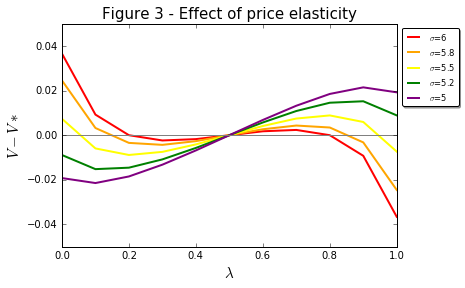

In [11]:
plt.clf()
plt.plot(range_labda, range_delta8, '-', color = 'red', linewidth=2,label="$\sigma$=6")
plt.plot(range_labda, range_delta9, '-', color = 'orange', linewidth=2,label="$\sigma$=5.8")
plt.plot(range_labda, range_delta10, '-', color = 'yellow', linewidth=2,label="$\sigma$=5.5")
plt.plot(range_labda, range_delta11, '-', color = 'green', linewidth=2,label="$\sigma$=5.2")
plt.plot(range_labda, range_delta12, '-', color = 'purple', linewidth=2,label="$\sigma$=5")
plt.axhline(0.0, color='grey')
plt.ylim(-.05,.05)
plt.xlim(0,1)
plt.title("Figure 3 - Effect of price elasticity",fontsize = 15) 
plt.xlabel("$\lambda$",fontsize = 15)
plt.ylabel("$V-V*$",fontsize = 15,rotation = 90)
plt.legend(loc="upper center", fontsize='small', shadow='true', fancybox=True, bbox_to_anchor=[1.1,1])

This figure shows the how price elasticity affects agglomeration. Price elasticity can be seen as a parameter of taste for variety. When the price elasticity decreases, people have a stronger taste for variety and are willing to pay more for a product that is different from the other products that are offered. In the figure can be seen that when the price elasticity decreases and thus the taste for variety increases, there are stronger agglomeration forces. Mobile workers are willing to move to the agglomeration where there is more variety. The immobile workers are willing to pay more for more variation and are thus willing to cover the transportation costs. Additionally a decrease in price elasticity will decrease the competition between firms, which makes forming agglomeration more profitable for manufacturers relative to a higher price elasticity. We can see that from a price elasticity between $\sigma$=5.2 and $\sigma$=5 there will be a full agglomeration.

In [12]:
alpha=0.3
sigma=6
tau=1.4
rho=1
rho2=1

def delta13 (labda):
    return DeltaV (labda,alpha,sigma,rho,rho2,tau)

range_labda = arange(0,1.1,0.1)
range_delta13 = [delta1(labda) for labda in range_labda]
 
rho=0.8
rho2=0.8
range_delta14 = [delta1(labda) for labda in range_labda]
 
rho=0.5
rho2=0.5
range_delta15 = [delta1(labda) for labda in range_labda]
 
rho=0.3
rho2=0.3
range_delta16 = [delta1(labda) for labda in range_labda]

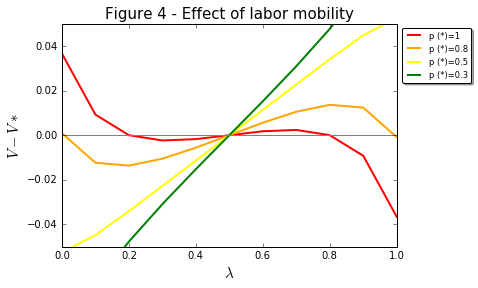

In [13]:
plt.clf()
plt.plot(range_labda, range_delta13, '-', color = 'red', linewidth=2,label="p (*)=1")
plt.plot(range_labda, range_delta14, '-', color = 'orange', linewidth=2,label="p (*)=0.8")
plt.plot(range_labda, range_delta15, '-', color = 'yellow', linewidth=2,label="p (*)=0.5")
plt.plot(range_labda, range_delta16, '-', color = 'green', linewidth=2,label="p (*)=0.3")
plt.axhline(0.0, color='grey')
plt.ylim(-.05,.05)
plt.xlim(0,1)
plt.title("Figure 4 - Effect of labor mobility",fontsize = 15) 
plt.xlabel("$\lambda$",fontsize = 15)
plt.ylabel("$V-V*$",fontsize = 15,rotation = 90)
plt.legend(loc="upper center", fontsize='small', shadow='true', fancybox=True, bbox_to_anchor=[1.12,1])

This figure shows the  effect of a decrease in the share of immobile workers relative to the mobile workers. It can be clearly seen that a decrease in the share of immobile workers $\rho$ and $\rho*$ will increase the degree of agglomeration. A reason for this is that transportation costs do not play an important role anymore since a bigger share of the population is mobile and thus able to move to the agglomeration. From $\rho$=0.8 and $\rho*$=0.8 and lower there will be full agglomeration.

## Conclusion <a id='conclusion'></a>

#### *Effect of transportation costs*
When there are no transportation costs, workers are indifferent between living in the home country or foreign country. As transportation costs increase there will be a full agglomeration for relatively low transportation costs. This means that all the mobile workers will locate either in the home country or the foreign country. When transportation increase further, smaller agglomeration will emerge where e.g. 20% of the mobile workers will locate in the home country and 80% in the foreign country. Lastly, when the transportation costs become even higher, there will be no agglomeration and the mobile workers will evenly split over the home and foreign country.

#### *Effect of price elasticity*
When the price elasticity decreases, this can be seen as a stronger taste of variety of the population. When price elasticity decreases, people are willing to pay more for variation. This results in less influence of transportation costs on the agglomeration. A decrease in price elasticity will result in an increase of agglomerations untill a full agglomeration emerges.

#### *Effect of labor mobility*
As the assumptions of the model state, only skilled labor is mobile. When the share of unskilled labor in the population decreases, the total mobility of workers increases. When this happens, agglomeration forces become stronger. The reason for this is that less products will have to be shipped and thus transportation costs have less influence on agglomeration. Additionally more people are able to move towards the agglomeration.

## Discussion

The results shown by our study are clear and logical. However, we think that the <a href='#assumptions'>assumptions</a> used in the model are very far away from reality. Therefore, the external validity of our results is very limited. The author of the model already realized this, however relaxing the assumptions would make the model not analytically solvable. Additional empirical research is needed to increase the robustness of this model.

## Appendix<a id='appendix'></a>

In [14]:
import plotly.tools as tls

tls.embed("https://plot.ly/~guuswakker/4/plot-1/")

In [15]:
import plotly.tools as tls

tls.embed("https://plot.ly/~guuswakker/10/t13-t14-t16-t18/")

In [16]:
import plotly.tools as tls

tls.embed("https://plot.ly/~guuswakker/11/_6-58-55-52-5/")

In [17]:
import plotly.tools as tls

tls.embed("https://plot.ly/~guuswakker/12/_1-08-05-03/")